In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [11]:
mean = [0,0]
cov = [[1,2],
        [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

NameError: name 'rand' is not defined

In [14]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [15]:
x[i] -=10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [16]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([ 0, 89, 90,  4, 90,  5,  6,  7, 89,  9])

In [17]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [19]:
np.random.seed(42)
x = np.random.randn(100)

#compute a histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

#find the appropriate bin for each x
i = np.searchsorted(bins, x)

#add 1 to each of these bins
np.add.at(counts, i, 1)

/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


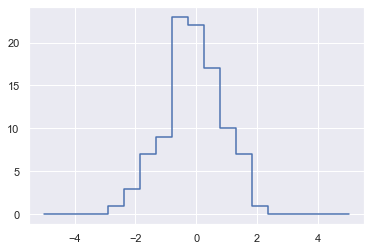

In [23]:
#plt the results
plt.plot(bins, counts, linestyle='steps');

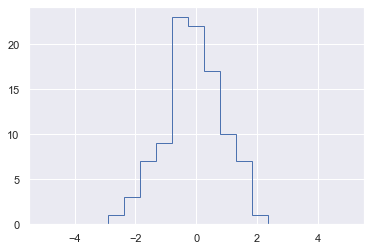

In [24]:
plt.hist(x, bins, histtype='step');

In [25]:
print("Numpy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x), 1)

Numpy routine:
29.7 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
14 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
x = np.random.randn(1000000)
print("Numpy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x), 1)

Numpy routine:
63.9 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
101 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [28]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [29]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [31]:
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [32]:
x[i]

array([1, 2, 3, 4, 5])

In [33]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [34]:
#Sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [35]:
#Sort X row wise
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [37]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,5)

array([2, 1, 3, 4, 5, 6, 7])

In [41]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [47]:
X = rand.rand(10,2)
print(X)

[[0.23089383 0.24102547]
 [0.68326352 0.60999666]
 [0.83319491 0.17336465]
 [0.39106061 0.18223609]
 [0.75536141 0.42515587]
 [0.20794166 0.56770033]
 [0.03131329 0.84228477]
 [0.44975413 0.39515024]
 [0.92665887 0.727272  ]
 [0.32654077 0.57044397]]


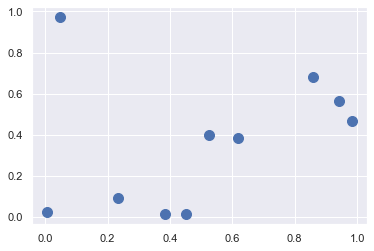

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [45]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq.shape

(10, 10)

In [46]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [48]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [49]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [50]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [52]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

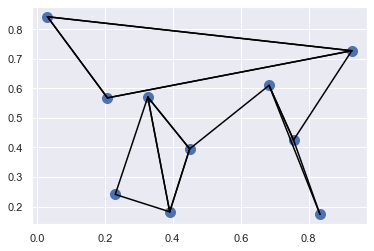

In [53]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')